<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
print("Total NaN's by column:")
print(auto.isnull().sum())
print('\n',"Total NaN's in dataframe: ",auto.isnull().sum().sum())

Total NaN's by column:
mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

 Total NaN's in dataframe:  5


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
auto[pd.isnull(auto).any(axis=1)]
# Comment (One - two sentence)
# Horsepower is the only feature with missing values, though there isn't a readily available explanation.
# Plotting a histogram of the values of HP does not show any obvious binning which would indicate poor data collection methodology.
# Perhaps understanding more about the data collection process would provide an explanation.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
# Command(s):
auto['horsepower'] = auto['horsepower'].fillna(auto['horsepower'].median())

# Comment (one sentence):
# The HP feature has a lot of variance in it, so using the median is probably not the best option.
# There is also almost certainly very strong relationship between the HP and the other features, so imputation 
# using some modeling technique would be better.

<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [5]:
# Develop the model 
import statsmodels.api as sm

y = auto['mpg']
X = auto.drop('mpg',axis=1)

mod = sm.OLS(y,X).fit()
mod.summary()
# Comment on its quality 
# This model does not perform very well. Despite a high R^2, the predictive power is quite low. The high f-stat shows that
# the model does not adequately estimate reality, and the high AIC/BIC figures provide further evidence that the model, 
# and its inputs, are not adequate.

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2961.
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:58:26   Log-Likelihood:                -1045.3
No. Observations:                 397   AIC:                             2105.
Df Residuals:                     390   BIC:                             2133.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6770      0.324     -2.092      0.037      -1.313      -0.041
displacement     0.0212      0.008      2.780      0.006       0.006       0.036
horsepower      -0.0348      0.012     -2.820      0.005      -0.059      -0.011
weight          -0.0062      0.001     -9.673      0.000      -0.008      -0.005
acceleration    -0.0608      0.089     -0.682      0.495      -0.236       0.114
year             0.5820      0.024     24.186      0.000       0.535       0.629
origin           1.2785      0.279      4.576      0.000       0.729       1.828
==============================================================================
Omnibus:                       46.144   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.987
Skew:                           0.677   Prob(JB):                     2.13e-19
Kurtosis:                       4.834   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

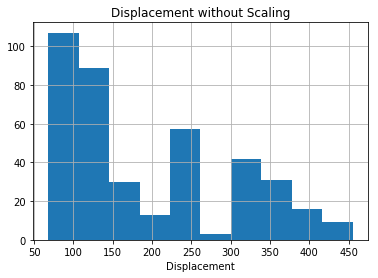

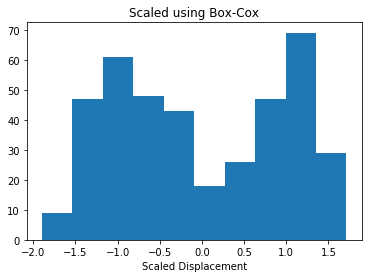

In [6]:
# Histogram of engine displacement
auto['displacement'].hist()
plt.xlabel('Displacement')
plt.title('Displacement without Scaling')
plt.show()

# Plot histogram of this new feature to reveal normal-like distribution
import numpy as np

# prep data
vals = auto['displacement'].values.reshape(-1,1)

#### Box-Cox transformation ####
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
bc = pt.fit_transform(vals)
plt.hist(bc)
plt.xlabel('Scaled Displacement')
plt.title('Scaled using Box-Cox')
plt.show()

# The displacement feature is much closer to a normal distribution after transformation

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [7]:
# Calculate then new model

# drop displacement and add the scaled displacement column
y = auto['mpg']
X = auto.drop('mpg',axis=1)
X['scaled_displacement'] = bc
X = X.drop('displacement',axis=1)

mod_disp_scaled = sm.OLS(y,X).fit()
mod_disp_scaled.summary()
# Comment on its performance
# The model using the scaled parameter has a lower AIC/BIC, meaning this model is using better parameters than the previous
# model.
# However, the difference is very slight, and there is no difference in the R^2 between the two models. The f-stat is actually
# higher for this model, indicating that we're further from the truth.
# Scaling just one parameter is likely causing some problems in the model. Scaling the rest of the parameters and correctly
# classifying discrete parameters (like cylinders) might improve the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2991.
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:58:27   Log-Likelihood:                -1043.4
No. Observations:                 397   AIC:                             2101.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cylinders               0.4146      0.280      1.480      0.140      -0.136       0.965
horsepower             -0.0330      0.012     -2.749      0.006      -0.057      -0.009
weight                 -0.0042      0.001     -6.038      0.000      -0.006      -0.003
acceleration           -0.2016      0.093     -2.180      0.030      -0.383      -0.020
year                    0.5204      0.026     19.865      0.000       0.469       0.572
origin                  0.4915      0.307      1.603      0.110      -0.111       1.094
scaled_displacement    -2.1691      0.636     -3.411      0.001      -3.419      -0.919
==============================================================================
Omnibus:                       59.386   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.567
Skew:                           0.746   Prob(JB):                     2.46e-32
Kurtosis:                       5.563   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [8]:
q8_X = auto.drop('mpg',axis=1)
q8_X['scaled_displacement'] = bc
q8_X.describe().loc[['mean','std']]

,cylinders,displacement,horsepower,weight,acceleration,year,origin,scaled_displacement
mean,5.458438,193.532746,104.331234,2970.261965,15.555668,75.994962,1.574307,1.306540e-15
std,1.701577,104.379583,38.266994,847.904119,2.749995,3.690005,0.802549,1.001262e+00


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [9]:
# Center and scale
from sklearn import preprocessing
scaled_auto = pd.DataFrame(preprocessing.scale(auto))
scaled_auto.columns = auto.columns
q9_y = scaled_auto['mpg']
q9_X = scaled_auto.drop('mpg',axis=1)
# Recalculate the model
mod_scaled = sm.OLS(q9_y,q9_X).fit()
mod_scaled.summary()
# Comment on its performance
# While the R^2 here is quite a bit lower than other models, this model would likely perform significantly better on
# unseen data. The AIC, BIC, and F-stat are all much much better for this model than for previous iterations.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Sun, 04 Nov 2018   Prob (F-statistic):          9.44e-142
Time:                        17:58:27   Log-Likelihood:                -221.05
No. Observations:                 397   AIC:                             456.1
Df Residuals:                     390   BIC:                             484.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0978      0.070     -1.396      0.163      -0.236       0.040
displacement     0.2559      0.100      2.558      0.011       0.059       0.453
horsepower      -0.0538      0.066     -0.816      0.415      -0.183       0.076
weight          -0.7257      0.070    -10.424      0.000      -0.863      -0.589
acceleration     0.0389      0.034      1.139      0.256      -0.028       0.106
year             0.3589      0.024     15.050      0.000       0.312       0.406
origin           0.1442      0.028      5.100      0.000       0.089       0.200
==============================================================================
Omnibus:                       29.910   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.012
Skew:                           0.508   Prob(JB):                     3.75e-11
Kurtosis:                       4.367   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""